In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

# Ignoring Unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#dataset = pd.read_csv('/content/drive/MyDrive/kaggle/parkinsons.data')
dataset = pd.read_csv("parkinsons.data", sep=',', index_col='name')

In [3]:
dataset.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
name                                                                      
phon_R01_S01_1      119.992       157.302        74.997         0.00784   
phon_R01_S01_2      122.400       148.650       113.819         0.00968   
phon_R01_S01_3      116.682       131.111       111.555         0.01050   
phon_R01_S01_4      116.676       137.871       111.366         0.00997   
phon_R01_S01_5      116.014       141.781       110.655         0.01284   

                MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
name                                                               
phon_R01_S01_1           0.00007   0.00370   0.00554     0.01109   
phon_R01_S01_2           0.00008   0.00465   0.00696     0.01394   
phon_R01_S01_3           0.00009   0.00544   0.00781     0.01633   
phon_R01_S01_4           0.00009   0.00502   0.00698     0.01505   
phon_R01_S01_5           0.00011   0.00655   0.00908     0.01966   

                MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA      NHR  \
name                                            ...                         
phon_R01_S01_1       0.04374             0.426  ...      0.06545  0.02211   
phon_R01_S01_2       0.06134             0.626  ...      0.09403  0.01929   
phon_R01_S01_3       0.05233             0.482  ...      0.08270  0.01309   
phon_R01_S01_4       0.05492             0.517  ...      0.08771  0.01353   
phon_R01_S01_5       0.06425             0.584  ...      0.10470  0.01767   

                   HNR  status      RPDE       DFA   spread1   spread2  \
name                                                                     
phon_R01_S01_1  21.033       1  0.414783  0.815285 -4.813031  0.266482   
phon_R01_S01_2  19.085       1  0.458359  0.819521 -4.075192  0.335590   
phon_R01_S01_3  20.651       1  0.429895  0.825288 -4.443179  0.311173   
phon_R01_S01_4  20.644       1  0.434969  0.819235 -4.117501  0.334147   
phon_R01_S01_5  19.649       1  0.417356  0.823484 -3.747787  0.234513   

                      D2       PPE  
name                                
phon_R01_S01_1  2.301442  0.284654  
phon_R01_S01_2  2.486855  0.368674  
phon_R01_S01_3  2.342259  0.332634  
phon_R01_S01_4  2.405554  0.368975  
phon_R01_S01_5  2.332180  0.410335  

[5 rows x 23 columns]

In [4]:
dataset.shape

(195, 23)

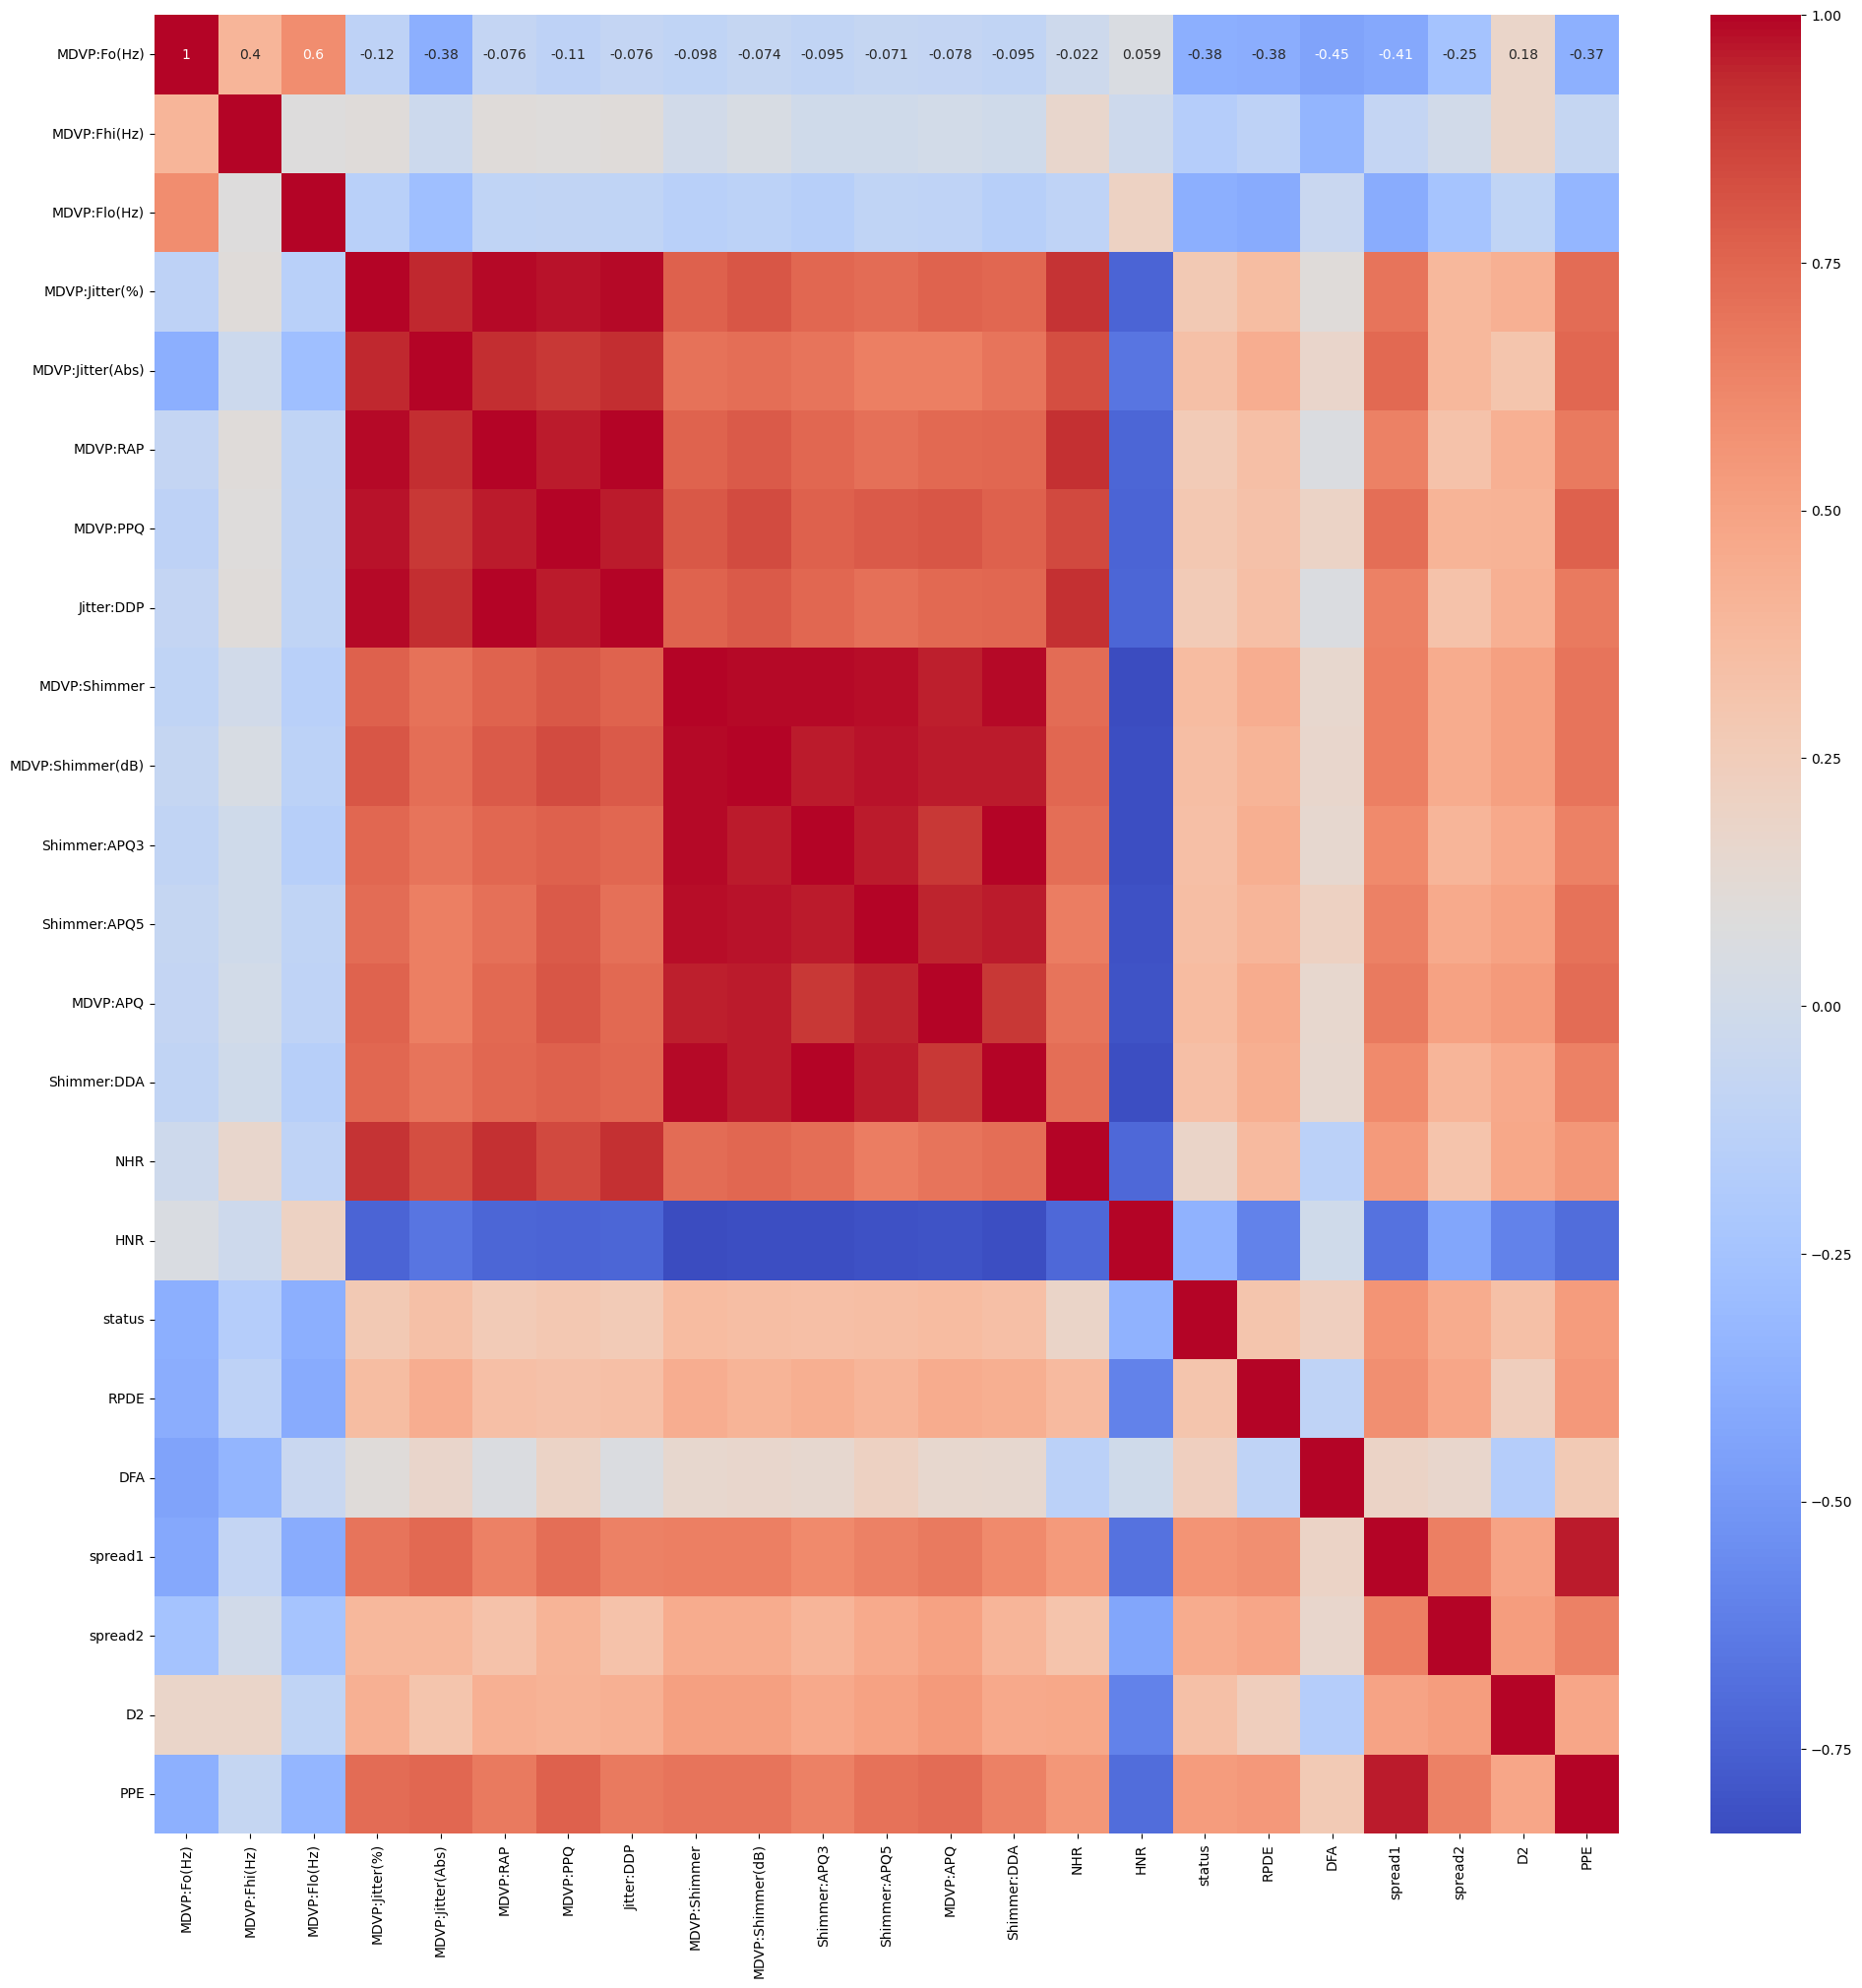

In [5]:
# Correlation matrix
corr = dataset.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

In [6]:
x = dataset.iloc[: , np.r_[0:16, 17:23]].values
y = dataset.iloc[: , 16].values

In [7]:
print(x)
dataset.shape

[[1.199920e+02 1.573020e+02 7.499700e+01 ... 2.664820e-01 2.301442e+00
  2.846540e-01]
 [1.224000e+02 1.486500e+02 1.138190e+02 ... 3.355900e-01 2.486855e+00
  3.686740e-01]
 [1.166820e+02 1.311110e+02 1.115550e+02 ... 3.111730e-01 2.342259e+00
  3.326340e-01]
 ...
 [1.746880e+02 2.400050e+02 7.428700e+01 ... 1.584530e-01 2.679772e+00
  1.317280e-01]
 [1.987640e+02 3.969610e+02 7.490400e+01 ... 2.074540e-01 2.138608e+00
  1.233060e-01]
 [2.142890e+02 2.602770e+02 7.797300e+01 ... 1.906670e-01 2.555477e+00
  1.485690e-01]]


(195, 23)

In [8]:
x.shape

(195, 22)

In [9]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False),[0])], remainder='passthrough')
# x = np.array(ct.fit_transform(x))

In [10]:
x.shape[1]

22

# splitting dataset

In [11]:

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 1,stratify=y)
# x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state= 1)

In [12]:
print(y_train)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0
 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1]


In [13]:
#import sys
#np.set_printoptions(threshold=sys.maxsize)
print(x_train)

[[1.582190e+02 4.425570e+02 7.194800e+01 ... 2.732800e-01 2.640798e+00
  1.701060e-01]
 [1.521250e+02 1.614690e+02 7.659600e+01 ... 1.735200e-01 2.080121e+00
  1.608090e-01]
 [1.746880e+02 2.400050e+02 7.428700e+01 ... 1.584530e-01 2.679772e+00
  1.317280e-01]
 ...
 [1.768240e+02 2.152930e+02 8.396100e+01 ... 2.816180e-01 2.655744e+00
  2.348090e-01]
 [1.761700e+02 1.856040e+02 1.635640e+02 ... 1.963710e-01 2.536527e+00
  1.732180e-01]
 [1.840550e+02 1.965370e+02 1.669770e+02 ... 6.341200e-02 2.361532e+00
  1.157300e-01]]


In [14]:
sc = StandardScaler()
# x_train[:,195:] = sc.fit_transform(x_train[:,195:])
# x_test[:,195:] = sc.transform(x_test[:,195:])
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [15]:
x_train

array([[ 0.04310816,  2.58750502, -1.02894433, ...,  0.50657055,
         0.62029563, -0.42911009],
       [-0.10416436, -0.40945256, -0.92324764, ..., -0.63475461,
        -0.79394444, -0.53001778],
       [ 0.4411113 ,  0.42789753, -0.97575488, ..., -0.80713177,
         0.71860284, -0.84565685],
       ...,
       [ 0.4927316 ,  0.16441842, -0.75576569, ...,  0.60196319,
         0.65799511,  0.27316269],
       [ 0.4769265 , -0.15212542,  1.05442653, ..., -0.37332296,
         0.35728462, -0.39533309],
       [ 0.66748177, -0.03555787,  1.13203901, ..., -1.89446822,
        -0.08411915, -1.01929578]])

In [16]:
def cm_displayer(cm):
  # Create a DataFrame from the confusion matrix.
  cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

  plt.figure(figsize=(10,7))

  # Create a heatmap from the DataFrame.
  sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')

  plt.title('Confusion Matrix')
  plt.show()

# Logistic Regression

In [17]:
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(x_train,y_train)


LogisticRegression(random_state=0)

In [18]:
test_value = [[ 5.29249395e-01, -1.03309592e-01,  1.11583374e+00,
        -5.23716022e-01, -6.82179904e-01, -4.29193964e-01,
        -4.66158519e-01, -4.28206106e-01, -6.17874540e-01,
        -6.05206208e-01, -6.44461440e-01, -5.48107644e-01,
        -5.58034900e-01, -6.44471776e-01, -5.39840575e-01,
         7.18861885e-01, -1.49332475e+00,  1.18499869e+00,
        -3.23304568e-01, -3.76742214e-01,  3.78931110e-01,
        -3.93143882e-01]]

print(lr_classifier.predict(test_value))

[1]


In [19]:
y_pred = lr_classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]]


0.7948717948717948


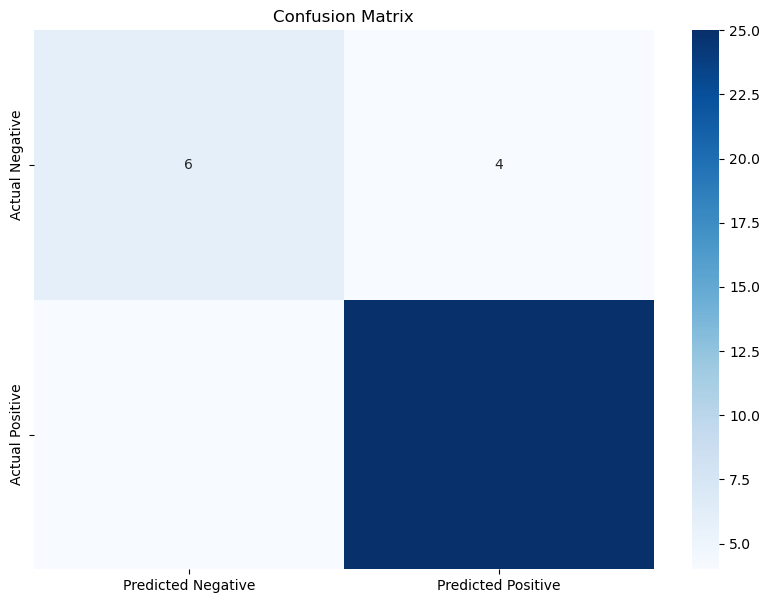

In [20]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

In [21]:
import pickle

LR_model_filename = "LR_model.pkl"

with open(LR_model_filename,"wb") as file:
  pickle.dump(lr_classifier,file)

In [22]:
with open(LR_model_filename,"rb") as file:
  Pickle_LR_model = pickle.load(file)

In [23]:
test_value = [[ 5.29249395e-01, -1.03309592e-01,  1.11583374e+00,
        -5.23716022e-01, -6.82179904e-01, -4.29193964e-01,
        -4.66158519e-01, -4.28206106e-01, -6.17874540e-01,
        -6.05206208e-01, -6.44461440e-01, -5.48107644e-01,
        -5.58034900e-01, -6.44471776e-01, -5.39840575e-01,
         7.18861885e-01, -1.49332475e+00,  1.18499869e+00,
        -3.23304568e-01, -3.76742214e-01,  3.78931110e-01,
        -3.93143882e-01]]

print(Pickle_LR_model.predict(test_value))

[1]


# KNN

In [24]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(x_train,y_train)

KNN_model_filename = "KNN_model.pkl"

with open(KNN_model_filename,"wb") as file:
  pickle.dump(knn_classifier,file)

In [25]:
y_pred = knn_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8717948717948718


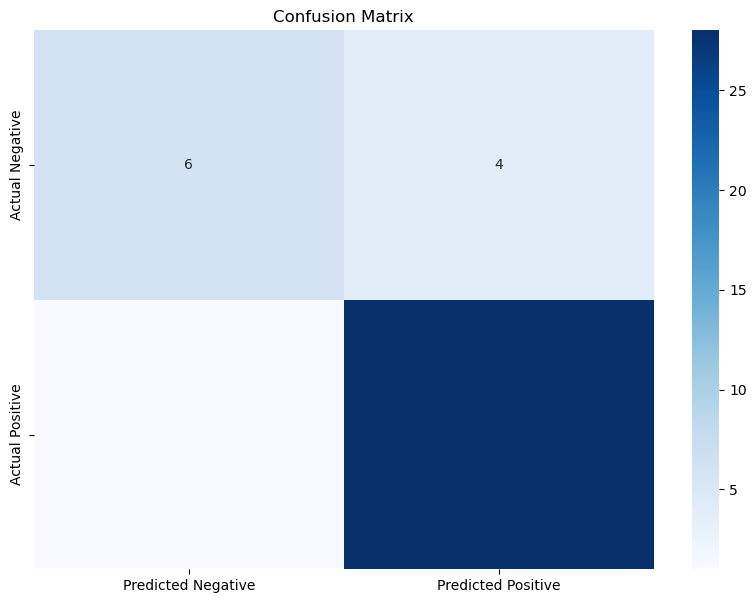

In [26]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# SVM

In [27]:
svm_classifier = SVC(kernel = 'linear',random_state = 0)
svm_classifier.fit(x_train,y_train)

SVM_model_filename = "SVM_model.pkl"

with open(SVM_model_filename,"wb") as file:
  pickle.dump(svm_classifier,file)

In [28]:
y_pred = svm_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8205128205128205


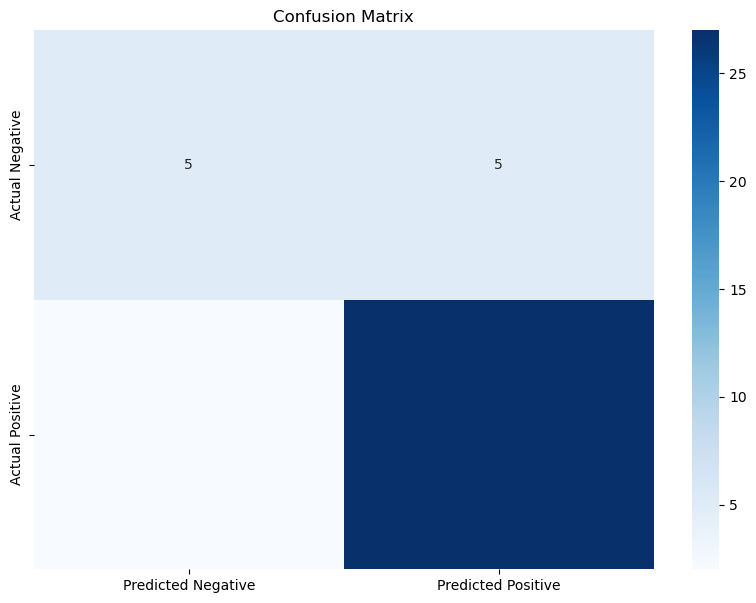

In [29]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

Decision Tree

# Decison Tree

In [30]:
dt_classifier = DecisionTreeClassifier(max_depth = 2 , random_state = 1)

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state= 1)

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

dt_classifier.fit(x_train, y_train)

dt_model_filename = "DT_model.pkl"

with open(dt_model_filename,"wb") as file:
  pickle.dump(dt_classifier,file)

In [31]:
y_pred = dt_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8461538461538461


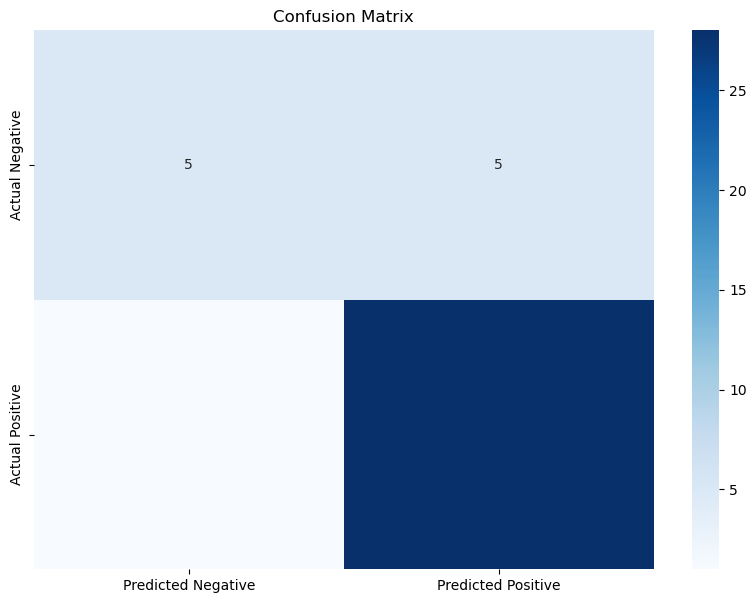

In [32]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# Ada Boost

In [33]:
from sklearn.ensemble import AdaBoostClassifier

abc_classifier = AdaBoostClassifier(n_estimators=50)

abc_classifier.fit(x_train,y_train)

abc_model_filename = "ABC_model.pkl"

with open(abc_model_filename,"wb") as file:
  pickle.dump(abc_classifier,file)

In [34]:
y_pred = abc_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8717948717948718


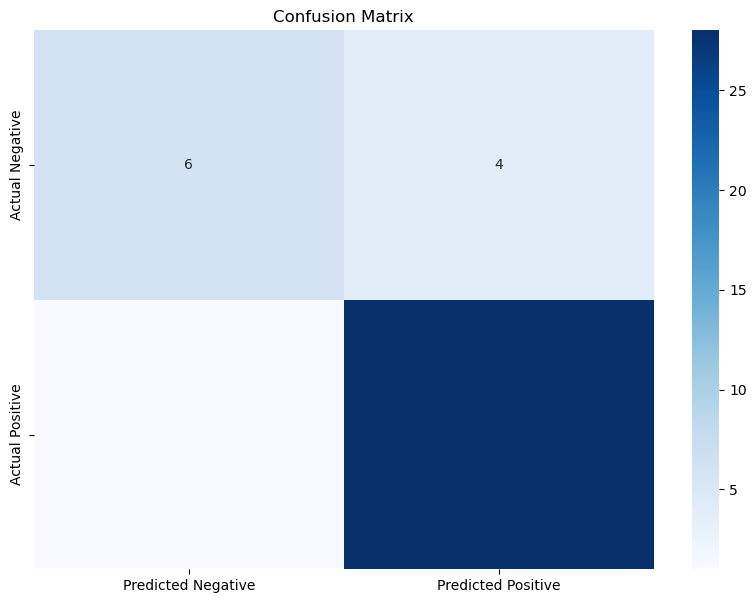

In [35]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

ANN


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=30,criterion='entropy',random_state=1)

rf_classifier.fit(x_train,y_train)

rf_model_filename = "RF_model.pkl"

with open(rf_model_filename,"wb") as file:
  pickle.dump(rf_classifier,file)

In [37]:
y_pred = rf_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8717948717948718


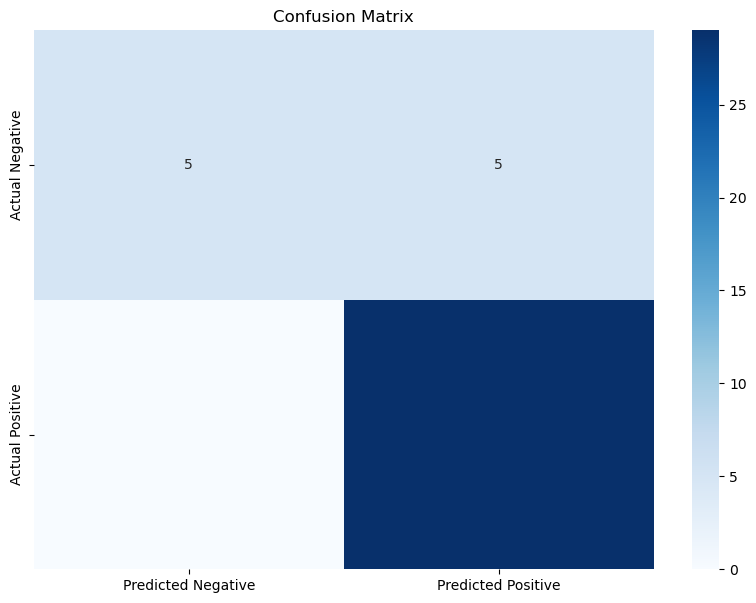

In [38]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

XGBoost

In [39]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

xgb_classifier.fit(x_train,y_train)

xgb_model_filename = "XG_model.pkl"

with open(xgb_model_filename,"wb") as file:
  pickle.dump(xgb_classifier,file)

In [40]:
y_pred = xgb_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.9230769230769231


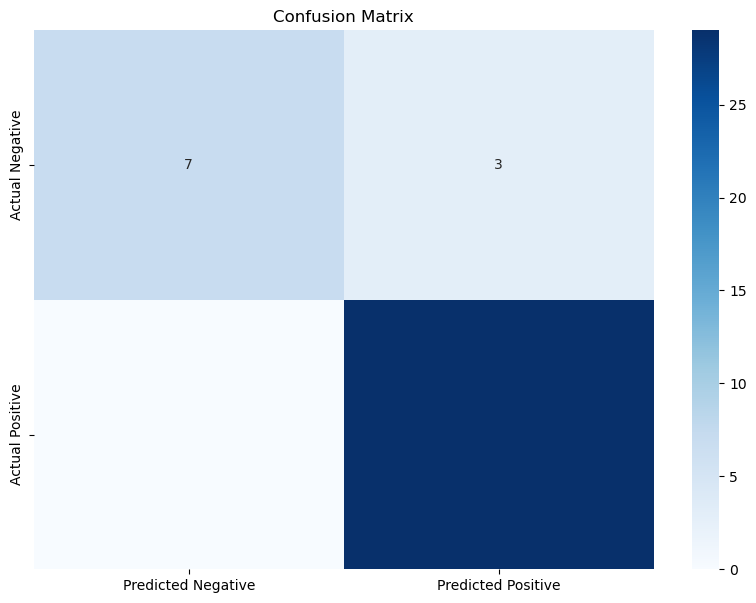

In [41]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# PCA Random Forests

In [42]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 1,stratify=y)

pca = PCA(n_components = 9)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

pca_rf_classifier = RandomForestClassifier(n_estimators=30,criterion='entropy',random_state=1)

pca_rf_classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=1)

In [43]:
y_pred = pca_rf_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8974358974358975


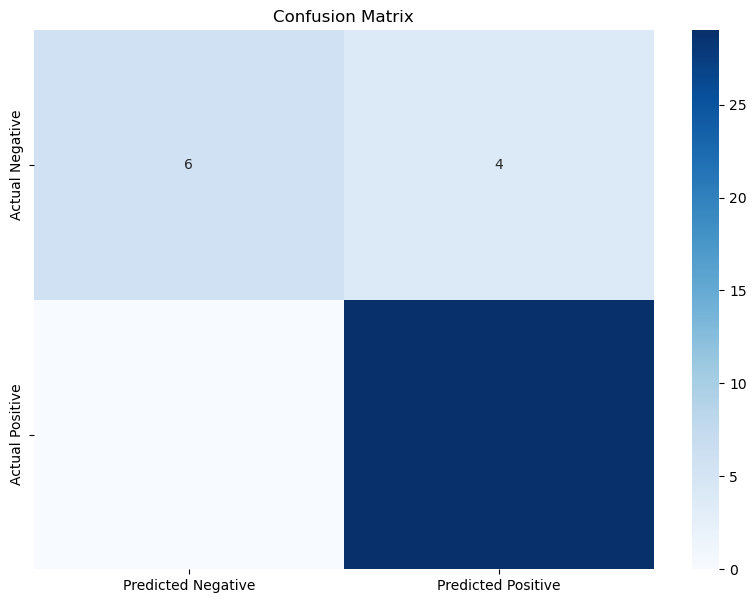

In [44]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# Accuracy , Precision , Recall And F1Score

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [46]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 1,stratify=y)
x_test = sc.fit_transform(x_test)

In [47]:
# def metric_printer(classifier):
#     y_pred = classifier.predict(x_test)
#     print("Classifier: ", classifier.__class__.__name__)
#     print("accuracy:" ,accuracy_score(y_test, y_pred))
#     print("Precision: ", precision_score(y_test, y_pred))
#     print("Recall: ", recall_score(y_test, y_pred))
#     print("F1 Score: ", f1_score(y_test, y_pred))
#     print('____________________________________')


In [48]:
import matplotlib.pyplot as plt

results = {}

def metric_printer(classifier):
    y_pred = classifier.predict(x_test)
    classifier_name = classifier.__class__.__name__
    print("Classifier: ", classifier_name)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: ", accuracy)
    precision = precision_score(y_test, y_pred)
    print("Precision: ", precision)
    recall = recall_score(y_test, y_pred)
    print("Recall: ", recall)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score: ", f1)
    print('____________________________________')

    results[classifier_name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}




In [49]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
def plot_results(results):
    for classifier_name, metrics in results.items():
        plt.figure(figsize=(10,5))
        plt.bar(metrics.keys(), metrics.values(),color=colors)
        plt.title(classifier_name)
        plt.show()

plot_results(results)

# **Comparision Of Accuracy Of Different Classifiers** 

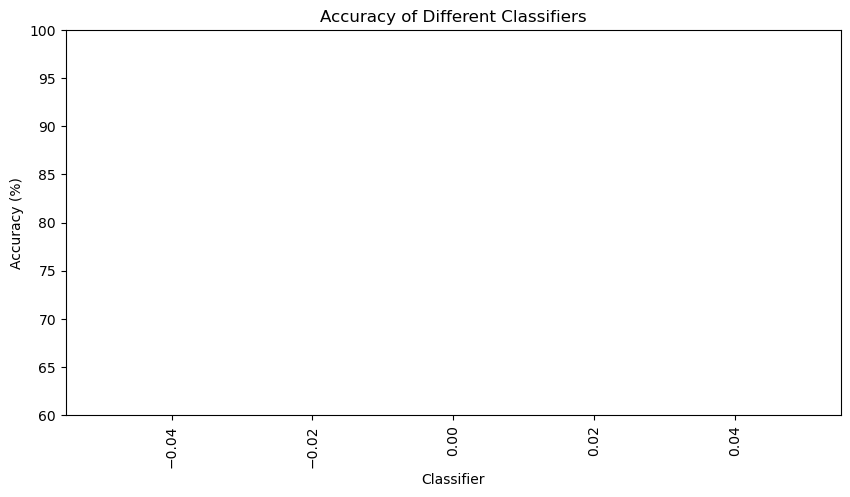

In [50]:
import matplotlib.pyplot as plt

def plot_results(results):
    plt.figure(figsize=(10,5))

    classifier_names = list(results.keys())
    accuracies = [metrics['accuracy']*100 for metrics in results.values()]

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    bars = plt.bar(classifier_names, accuracies, color = colors)
    plt.title('Accuracy of Different Classifiers')
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy (%)')
    plt.ylim([60, 100])
    plt.xticks(rotation=90)

    for bar in bars:
        yval = round(bar.get_height(), 2)
        plt.text(bar.get_x() + bar.get_width()/2, yval, yval, va='bottom', ha='center')

    plt.show()

# Assuming `results` is a dictionary containing classifier names as keys and their performance metrics as values
# Example: results = {'Random Forest': {'accuracy': 0.85, 'precision': 0.87, ...}, ...}
plot_results(results)


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("parkinsons.data", delimiter=",")

# Define features and target variable
X = data.drop(columns=['name', 'status'])
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9487179487179487


In [52]:
# Replace this section in the code above with the following

# Now, let's use the trained model to predict the status of the new subject
# You need to replace the values in the new_subject list with the corresponding feature values of the new subject
new_subject = [197.07600, 206.89600, 192.05500, 0.00289, 0.00001, 0.00166, 0.00168, 0.00498, 0.01098, 0.09700, 0.00563, 0.00680, 0.00802, 0.01689, 0.00339, 26.77500, 0.422229, 0.741367, -7.348300, 0.177551, 1.743867, 0.085569]

# Reshape the new subject data into a 2D array
new_subject = [new_subject]

# Make prediction for the new subject
prediction = clf.predict(new_subject)
if prediction[0] == 1:
    print("The Person has Parkinson's disease.")
else:
    print("The Person is healthy.")


The Person is healthy.


In [53]:
# Now, let's use the trained model to predict the status of a new subject
# You need to replace the values in the new_subject list with the corresponding feature values of the new subject
new_subject = [119.99200, 157.30200, 74.99700, 0.00784, 0.00007, 0.00370, 0.00554, 0.01109, 0.04374, 0.42600, 0.02182, 0.03130, 0.02971, 0.06545, 0.02211, 21.03300, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442, 0.284654]

# Reshape the new subject data into a 2D array
new_subject = [new_subject]

# Make prediction for the new subject
prediction = clf.predict(new_subject)
if prediction[0] == 1:
    print("The Person has Parkinson's disease.")
else:
    print("The Person is healthy.")


The Person has Parkinson's disease.
